Dimensões originais da imagem: (512, 512, 3)
Dimensões após conversão para cinza: (512, 512)
Dimensões como tensor PyTorch: torch.Size([1, 1, 512, 512])


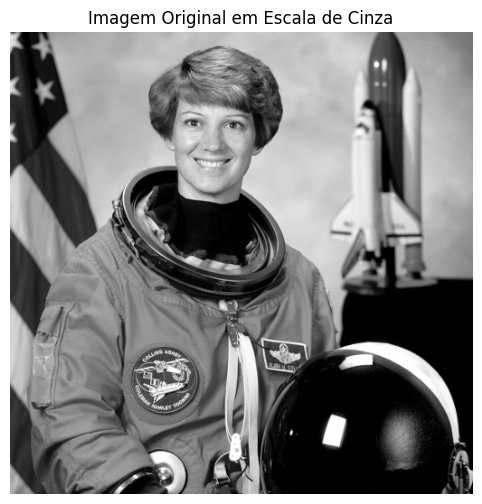

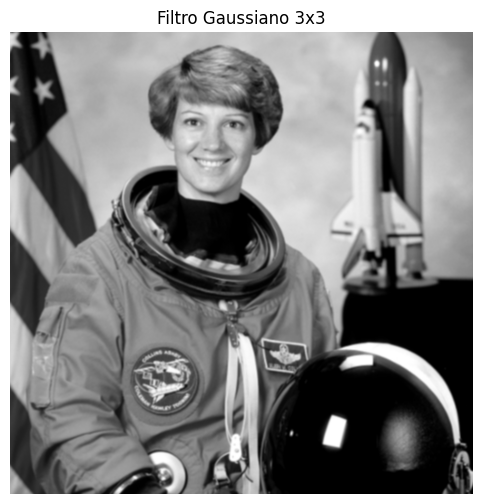

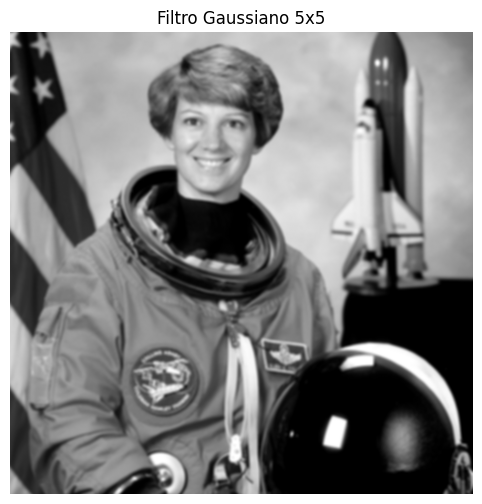

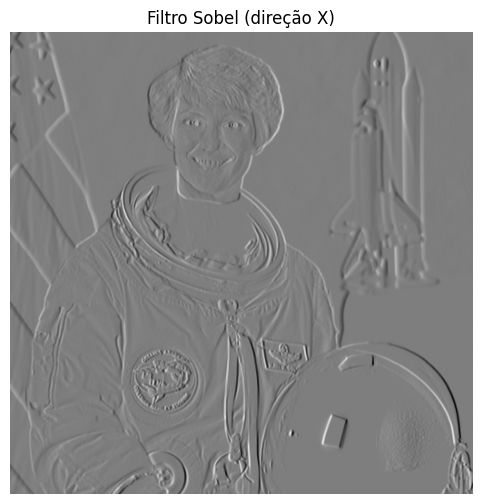

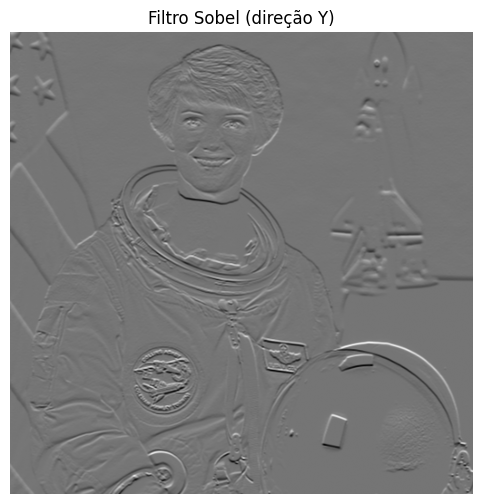

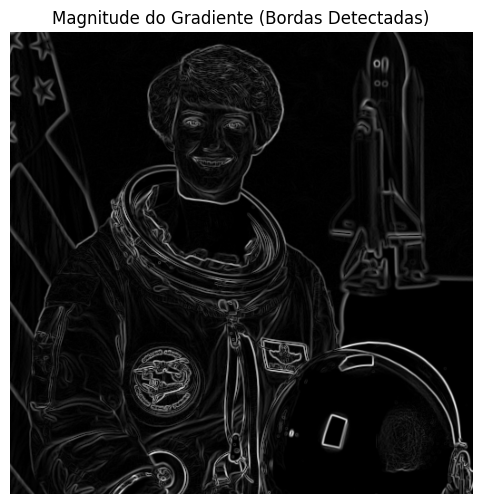

In [6]:
# Importação das bibliotecas necessárias
import torch  # Para operações com tensores e redes neurais
from PIL import Image  # Para manipulação de imagens
import matplotlib.pyplot as plt  # Para visualização
import numpy as np  # Para operações numéricas
from skimage import data  # Para carregar imagens de exemplo

# PREPARAÇÃO DOS DADOS --------------------------------------------------------

# Carrega uma imagem de exemplo (astronauta) e converte para array numpy
image = Image.fromarray(data.astronaut())
data = np.asarray(image)
print("Dimensões originais da imagem:", data.shape)

# Pesos para conversão RGB para escala de cinza (padrão de luminosidade)
rgbWeights = [0.2989, 0.5870, 0.1140]

# Converte a imagem colorida para escala de cinza usando os pesos RGB
data = np.dot(data[..., :3], rgbWeights)
print("Dimensões após conversão para cinza:", data.shape)

# Converte para tensor PyTorch e adiciona dimensões de batch e canal
data = torch.from_numpy(data).unsqueeze(0).unsqueeze(0).to(torch.float32)
print("Dimensões como tensor PyTorch:", data.shape)

# FUNÇÃO AUXILIAR -------------------------------------------------------------

def makeFilter(input):
    """
    Cria uma camada de convolução 2D com um filtro personalizado.

    Args:
        input: Tensor com os pesos do filtro (formato [1, 1, kernel_size, kernel_size])

    Retorna:
        Uma camada Conv2d com os pesos fixados no filtro especificado
    """
    # Cria camada convolucional sem bias (apenas filtro)
    filter = torch.nn.Conv2d(
        1, 1,
        kernel_size=input.shape[-1],  # Assume filtro quadrado
        stride=1,
        padding=0,
        bias=False
    )
    # Define os pesos do filtro
    filter.weight.data = input
    return filter

# VISUALIZAÇÃO DA IMAGEM ORIGINAL ---------------------------------------------

plt.figure(figsize=(12, 6))
plt.imshow(data.squeeze(), cmap="gray")
plt.axis("off")
plt.title("Imagem Original em Escala de Cinza")
plt.show()

# APLICAÇÃO DE FILTROS --------------------------------------------------------

# Filtro Gaussiano 3x3 (suavização)
gaussianFilter3By3 = makeFilter(
    torch.tensor([[[[1.0, 2.0, 1.0],
                   [2.0, 4.0, 2.0],
                   [1.0, 2.0, 1.0]]]]) / 16.0  # Normalização
)

output = gaussianFilter3By3(data).detach()

plt.figure(figsize=(12, 6))
plt.imshow(output.squeeze(), cmap="gray")
plt.axis("off")
plt.title("Filtro Gaussiano 3x3")
plt.show()

# Filtro Gaussiano 5x5 (suavização mais intensa)
gaussianFilter5By5 = makeFilter(
    torch.tensor([[[[2.0, 4.0, 5.0, 4.0, 2.0],
                   [4.0, 9.0, 12.0, 9.0, 4.0],
                   [5.0, 12.0, 15.0, 12.0, 5.0],
                   [4.0, 9.0, 12.0, 9.0, 4.0],
                   [2.0, 4.0, 5.0, 4.0, 2.0]]]]) / 159.0  # Normalização
)

output = gaussianFilter5By5(data).detach()

plt.figure(figsize=(12, 6))
plt.imshow(output.squeeze(), cmap="gray")
plt.axis("off")
plt.title("Filtro Gaussiano 5x5")
plt.show()

# Filtro Sobel para detecção de bordas horizontais
sobelxFilter = makeFilter(
    torch.tensor([[[[-1.0, 0.0, 1.0],
                   [-2.0, 0.0, 2.0],
                   [-1.0, 0.0, 1.0]]]])
)

outputx = sobelxFilter(data).detach()

plt.figure(figsize=(12, 6))
plt.imshow(outputx.squeeze(), cmap="gray")
plt.axis("off")
plt.title("Filtro Sobel (direção X)")
plt.show()

# Filtro Sobel para detecção de bordas verticais
sobelyFilter = makeFilter(
    torch.tensor([[[[-1.0, -2.0, -1.0],
                   [0.0, 0.0, 0.0],
                   [1.0, 2.0, 1.0]]]])
)

outputy = sobelyFilter(data).detach()

plt.figure(figsize=(12, 6))
plt.imshow(outputy.squeeze(), cmap="gray")
plt.axis("off")
plt.title("Filtro Sobel (direção Y)")
plt.show()

# MAGNITUDE DO GRADIENTE ------------------------------------------------------

# Calcula a magnitude do gradiente combinando as derivadas x e y
gradientMagnitude = torch.sqrt(outputx**2 + outputy**2)

plt.figure(figsize=(12, 6))
plt.imshow(gradientMagnitude.squeeze(), cmap="gray")
plt.axis("off")
plt.title("Magnitude do Gradiente (Bordas Detectadas)")
plt.show()